In [1]:
%matplotlib notebook
from ipywidgets import *
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib
import cv2
from matplotlib.animation import FuncAnimation
import skvideo.io
import pandas as pd
import time
from datetime import timedelta

In [2]:
#Stress data
#participant C100
source='E:\Stress.csv'
data=pd.read_csv(source,header=0)
l=len(data)
for line in range(1,l):
    data=data.append({'Unix timestamp': data['Unix timestamp'][line]-1, 'Stress response': data['Stress response'][line-1]}, ignore_index=True)
data=data.sort_values(by='Unix timestamp')
data.index=pd.to_datetime(data['Unix timestamp'],unit='s')

In [3]:
EDA_file=pd.read_csv(r'H:\Stress on the road\C100\EDA\1532049008_A00E6B_C100\EDA.csv',header=None)
EDAstart=EDA_file.values[0]
EDAfreq=EDA_file.values[1]
EDA=EDA_file.iloc[2:]
base=pd.to_datetime(EDAstart,unit='s')
arr = np.array([base + timedelta(milliseconds=(i*250)) for i in range(0,len(EDA))])
arr=arr.reshape(-1,)
EDA.index=arr
EDA.columns=['EDA']

In [4]:
EDA_HR_file=pd.read_csv(r'H:\Stress on the road\C100\EDA\1532049008_A00E6B_C100\HR.csv',header=None)
EDAstart_HR=EDA_file.values[0]
EDAfreq_HR=EDA_file.values[1]
EDA_HR=EDA_HR_file.iloc[2:]
base=pd.to_datetime(EDAstart_HR,unit='s')
arr = np.array([base + timedelta(seconds=(i)) for i in range(0,len(EDA_HR))])
arr=arr.reshape(-1,)
EDA_HR.index=arr
EDA_HR.columns=['HR']

In [5]:
#HR and BR data
HRsource='H:\Stress on the road\C100\Zephyr\2018_07_19-18_08_48\2018_07_19-18_08_48_General.csv'
HRdata=pd.read_csv(r'H:\Stress on the road\C100\Zephyr\2018_07_19-18_08_48\2018_07_19-18_08_48_General.csv',header=0)
HRdata.index=pd.to_datetime(HRdata['Timestamp'],dayfirst=True)
#localizing time format, convert it and delocalize it
HRdata.index=HRdata.index.tz_localize('US/Pacific').tz_convert('GMT').tz_localize(None)

In [6]:
delta = timedelta(
...     days=0,
...     seconds=5,
...     microseconds=0,
...     milliseconds=0,
...     minutes=0,
...     hours=0,
...     weeks=0
... )

In [10]:
#inF=skvideo.io.vread(r'H:\Stress on the road\C104\C104.mov')

In [7]:
Vidstart=1532049554.04
Vidstart_time=pd.to_datetime('1532049554.04',unit='s')
fps=23

<IPython.core.display.Javascript object>


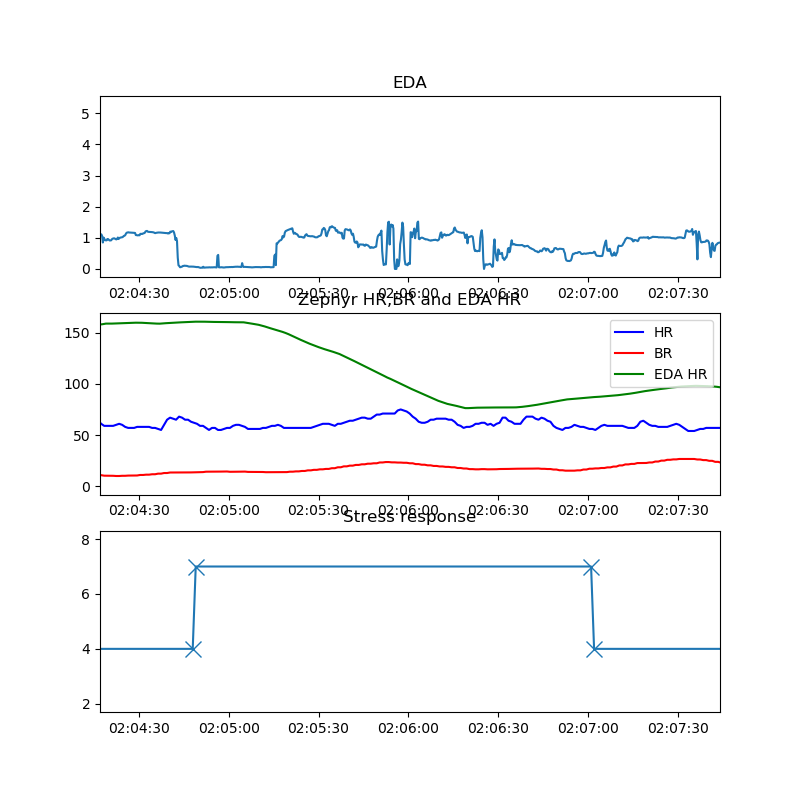

interactive(children=(IntSlider(value=0, description='Pan', max=5452), IntSlider(value=5, description='Zoom', …

In [9]:
fps=23
xmin=max(min(HRdata.index),Vidstart_time)
xmax=max(HRdata.index)
x1=xmin
x2=x1+delta
vid_start=((xmin-Vidstart_time).seconds)*fps
max_val=(max(HRdata.index)-min(HRdata.index)).seconds
#create two subplots
fig,(ax4,ax1,ax3)=plt.subplots(3,1,figsize=(8,8))
#ax1=fig.add_subplot(3,1,3)
ax1.plot(HRdata.index,HRdata.HR,'b',linestyle='-',label='HR')
ax1.plot(HRdata.index,HRdata.BR,'r',linestyle='-',label='BR')
ax1.plot(EDA_HR.index,EDA_HR.HR,'g',linestyle='-',label='EDA HR')
ax3.plot(data.index,data['Stress response'],marker='x',markersize=12,label='Stressor')
ax4.plot(EDA.index,EDA.EDA,label='EDA')

#create two image plots
#im1 = ax1.imshow(grab_frame(cap1))
#im2 = ax2.imshow(inF[vid_start])
ax1.legend()
ax1.set_title('Zephyr HR,BR and EDA HR')
ax3.set_title('Stress response')  
ax4.set_title('EDA')  
ax1.get_shared_x_axes().join(ax1, ax3,ax4)
#ax1.get_shared_x_axes().join(ax1, ax4)
ax1.set_xlim(0,10)
#file=open('FigureObject.fig.pickle', 'wb')
#pickle.dump(fig, file)
#file.close
plt.show()




def update_image(j):
    #print(j)
    global x1,x2
    if j<(slider3.value*fps):
        im2 = ax2.imshow(inF[vid_start+(x1*fps)+j])

#ani1 = FuncAnimation(plt.gcf(), update_image, frames=frame, interval=10,repeat=True)



def update_axis(w,s):
    global xmin,xmax,x1,x2,frame_rate,frame
    delta_w=timedelta(seconds=w)
    delta_s=timedelta(seconds=s)
    x1=xmin+delta_w
    x2=min(xmin+delta_w+delta_s,xmax)
    #frame=frame_rate*slider3.value
    ax1.set_xlim(x1,x2)
    fig.canvas.draw_idle()

slider3=IntSlider(min=1, max=max_val-1, step=1, value=5,description='Zoom')
slider2=IntSlider(min=0, max=max_val-1, step=1, value=0,description='Pan')
interact(update_axis, w=slider2,s=slider3);    




from IPython.display import HTML
#HTML(ani.to_jshtml())
#HTML(ani1.to_jshtml())
#ani.save('testing.mp4')

In [117]:
HRdata.columns

Index(['Timestamp', 'HR', 'BR', 'Temp', 'Posture', 'Activity', 'Acceleration',
       'Battery', 'BRAmplitude', 'ECGAmplitude', 'ECGNoise', 'XMin', 'XPeak',
       'YMin', 'YPeak', 'ZMin', 'ZPeak'],
      dtype='object')